In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_df, how='outer', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [35]:
combined_df.groupby(['type']).sum()

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


## Bubble Plot of Ride Sharing Data

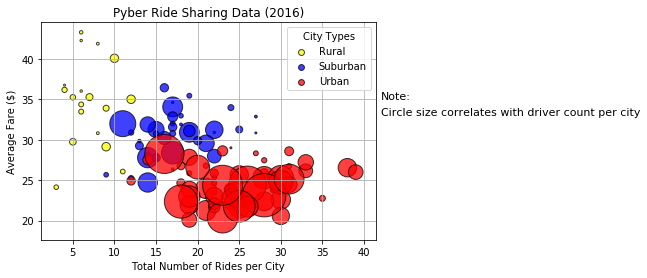

In [2]:
#---------------------------------------------------------------------------#
#------Obtain the x and y coordinates for each of the three city types------#
#---------------------------------------------------------------------------#

# First, create new dataframe with variables we want to look at
new_df = combined_df[['fare','ride_id','driver_count','type','city']]
grouped_df = new_df.groupby(['type','city'])

# Create a dataframe for each city type, and create the x and y axes

rural = new_df[new_df["type"] == "Rural"]
rural_grouped = rural.groupby(['type','city'])
rural_x = rural_grouped["ride_id"].count()
rural_y = rural_grouped["fare"].mean()

suburban = new_df[new_df["type"] == "Suburban"]
suburban_grouped = suburban.groupby(['type','city'])
suburban_x = suburban_grouped["ride_id"].count()
suburban_y = suburban_grouped["fare"].mean()

urban = new_df[new_df["type"] == "Urban"]
urban_grouped = urban.groupby(['type','city'])
urban_x = urban_grouped["ride_id"].count()
urban_y = urban_grouped["fare"].mean()

# Create size, based on driver count per city
size = grouped_df["driver_count"].sum()

#-----------------------------------------------------#
#-----Build the scatter plots for each city types-----#
#-----------------------------------------------------#

plt.scatter(rural_x, rural_y, marker="o", label = "Rural", facecolors="yellow", edgecolors="black", s=size, alpha=0.75)
plt.scatter(suburban_x, suburban_y, marker="o", label = "Suburban", facecolors="blue", edgecolors="black", s=size, alpha=0.75)
plt.scatter(urban_x, urban_y, marker="o", label = "Urban", facecolors="red", edgecolors="black", s=size, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc = "best", scatterpoints=1, fontsize=10, title = "City Types")
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(42,35, r'Note:', fontsize=11)
plt.text(42,33, r'Circle size correlates with driver count per city', fontsize=11)

# Show plot
plt.show()

## Total Fares by City Type

Calculate Type Percents

Build Pie Chart

Save Figure

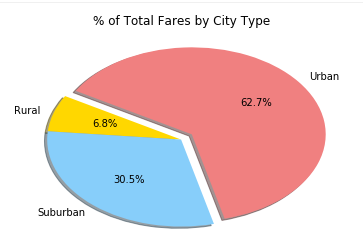

C:\Users\T430s\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


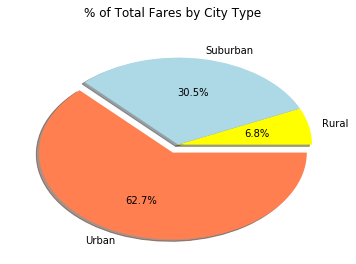

In [21]:
#--------------------------------------#
#------Calculate Type Percentages------#
#--------------------------------------#

# First, gather only variables included. Then group by Type, sum fares for each type, get total, 
# and divide the count of each by total for percentages.

total_fares_df = combined_df[['type','fare']]
total_fares_grouped = total_fares_df.groupby(['type'])
fares_each = total_fares_grouped.sum()
total = fares_each.sum()
percentages = fares_each/total
percentages.style.format({"ride_id":"{:.2%}"})

#--------------------------------------#
#------------Build Pie Chart-----------#
#--------------------------------------#

colors = ["yellow","lightblue",'coral']
explode = [0.0, 0.0, 0.1]
pie = percentages.plot(kind = "pie", colors = colors, subplots = True, explode = explode, autopct="%1.1f%%", 
                       shadow = True, title = "% of Total Fares by City Type", legend = None)
plt.axes().set_ylabel('')
#plt.axis("equal")
plt.show()

## Total Rides by City Type

Calculate Ride Percents

Build Pie Chart

Save Figure

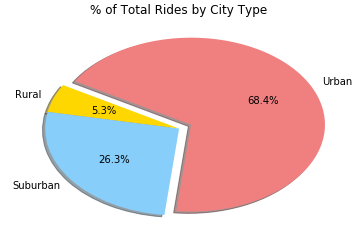

C:\Users\T430s\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


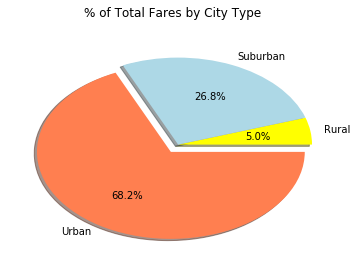

In [22]:
#--------------------------------------#
#------Calculate Type Percentages------#
#--------------------------------------#

# First, gather only variables included. Then group by Type, count rides for each type, get total, 
# and divide the count of each by total for percentages.

total_rides_df = combined_df[['type','ride_id']]
total_rides_grouped = total_rides_df.groupby(['type'])
rides_each = total_rides_grouped.sum()
total = rides_each.sum()
percentages = rides_each/total
percentages.style.format({"ride_id":"{:.2%}"})

#--------------------------------------#
#------------Build Pie Chart-----------#
#--------------------------------------#

colors = ["yellow","lightblue",'coral']
explode = [0.0, 0.0, 0.1]
pie = percentages.plot(kind = "pie", colors = colors, subplots = True, explode = explode, autopct="%1.1f%%", 
                       shadow = True, title = "% of Total Fares by City Type", legend = None)
plt.axes().set_ylabel('')
#plt.axis("equal")
plt.show()

## Total Drivers by City Type

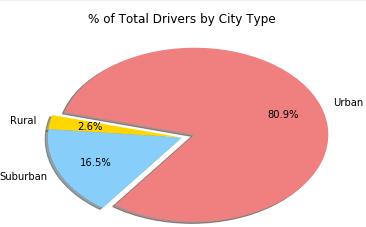

In [18]:
drivers_each.nunique()

TypeError: unhashable type: 'numpy.ndarray'

C:\Users\T430s\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


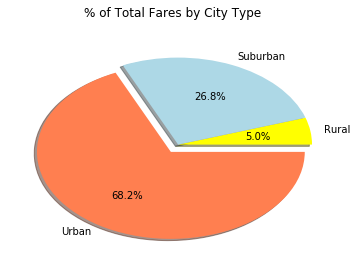

In [33]:
#--------------------------------------#
#------Calculate Type Percentages------#
#--------------------------------------#

# First, gather only variables included. Then group by Type, count rides for each type, get total, 
# and divide the count of each by total for percentages.

total_rides_df = combined_df[['type','ride_id']]
total_rides_grouped = total_rides_df.groupby(['type'])
rides_each = total_rides_grouped.sum()
total = rides_each.sum()
percentages = rides_each/total
percentages.style.format({"ride_id":"{:.2%}"})

#--------------------------------------#
#------------Build Pie Chart-----------#
#--------------------------------------#

colors = ["yellow","lightblue",'coral']
explode = [0.0, 0.0, 0.1]
pie = percentages.plot(kind = "pie", colors = colors, subplots = True, explode = explode, autopct="%1.1f%%", 
                       shadow = True, title = "% of Total Fares by City Type", legend = None)
plt.axes().set_ylabel('')
#plt.axis("equal")
plt.show()

In [15]:
total_drivers

NameError: name 'total_drivers' is not defined